In [3]:
# import required libraries
# pandas:Data framework library for Python
# sklearn: Library to perform machine learning tasks
import pandas as pd
import numpy as np
import scipy
import scipy.stats as st
import sklearn 
import sklearn.datasets
import sklearn.metrics as metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import StratifiedKFold
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.feature_selection import mutual_info_classif
from scipy import stats

In [133]:
from datetime import datetime

In [5]:
Data_2017 = pd.read_excel("PERM_Disclosure_Data_FY17.xlsx")

In [333]:
Data_2015 = pd.read_excel("PERM_Disclosure_Data_FY15_Q4.xlsx", converters= {'RI_LOCAL_ETHNIC_PAPER_FROM': str})

In [14]:
Data_2016 = pd.read_excel("PERM_Data_FY16.xlsx")

In [349]:
#pd.to_datetime(Data_2015['RI_LOCAL_ETHNIC_PAPER_FROM'].iloc[2][:10], format='%Y-%m-%d')
#datetime.strptime(Data_2015['RI_LOCAL_ETHNIC_PAPER_FROM'].iloc[2][:10], '%m%Y')

Data_2015['RI_LOCAL_ETHNIC_PAPER_FROM'] = np.where(Data_2015['RI_LOCAL_ETHNIC_PAPER_FROM'].isnull(), pd.NaT, Data_2015['RI_LOCAL_ETHNIC_PAPER_FROM'])

In [351]:
Data_2015['RI_LOCAL_ETHNIC_PAPER_FROM']  = pd.to_datetime(Data_2015['RI_LOCAL_ETHNIC_PAPER_FROM'] )

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1014-10-22 00:00:00

In [350]:
Data_2015.dtypes

CASE_NUMBER                               object
DECISION_DATE                     datetime64[ns]
CASE_STATUS                               object
CASE_RECEIVED_DATE                datetime64[ns]
REFILE                                    object
ORIG_FILE_DATE                    datetime64[ns]
ORIG_CASE_NO                              object
SCHD_A_SHEEPHERDER                        object
EMPLOYER_NAME                             object
EMPLOYER_ADDRESS_1                        object
EMPLOYER_ADDRESS_2                        object
EMPLOYER_CITY                             object
EMPLOYER_STATE                            object
EMPLOYER_COUNTRY                          object
EMPLOYER_POSTAL_CODE                      object
EMPLOYER_PHONE                            object
EMPLOYER_PHONE_EXT                        object
EMPLOYER_NUM_EMPLOYEES                   float64
EMPLOYER_YR_ESTAB                        float64
FW_OWNERSHIP_INTEREST                     object
AGENT_FIRM_NAME     

In [60]:
nm15 = list(Data_2015.columns.values)
nm16 = list(Data_2016.columns.values)
nm17 = list(Data_2017.columns.values)

In [36]:
#Change the column names so they match between years
Data_2016=Data_2016.rename(columns = {'FW_INFO_REL_OCCUP_EXPERIENCE':'FW_INFO_REL_OCCUP_EXP'})
Data_2015=Data_2015.rename(columns = {'JI_FOREIGN_WORKER_LIVE_ON_PREMISES':'JI_FW_LIVE_ON_PREMISES'})
Data_2015=Data_2015.rename(columns = {'REC_INFO_BARG_REP_NOTIFIED':'RECR_INFO_BARG_REP_NOTIFIED'})
Data_2015=Data_2015.rename(columns = {'JI_OFFERED_TO_SEC_J_FOREIGN_WORKER':'JI_OFFERED_TO_SEC_J_FW'})
Data_2017=Data_2017.rename(columns = {'PW_JOB_TITLE_9089':'PW_Job_Title_9089'})

In [65]:
frames = [Data_2015, Data_2016, Data_2016]

data = pd.concat(frames)

In [77]:
data.shape
#number of rows, cols

(341585, 125)

In [71]:
data.CASE_STATUS.unique()

array(['Certified-Expired', 'Certified', 'Denied', 'Withdrawn'], dtype=object)

In [149]:
(data['CASE_STATUS'].value_counts(dropna=False) / data['CASE_STATUS'].value_counts(dropna=False).sum()) * 100

Certified            46.466619
Certified-Expired    44.522154
Denied                5.011637
Withdrawn             3.999590
Name: CASE_STATUS, dtype: float64

In [148]:
(data['REFILE'].value_counts(dropna=False) / data['REFILE'].value_counts(dropna=False).sum()) * 100
#small percentage of refile, no need

NaN    71.137199
N      28.821816
Y       0.040985
Name: REFILE, dtype: float64

In [150]:
(data['SCHD_A_SHEEPHERDER'].value_counts(dropna=False) / data['SCHD_A_SHEEPHERDER'].value_counts(dropna=False).sum()) * 100

N      99.990046
NaN     0.009954
Name: SCHD_A_SHEEPHERDER, dtype: float64

In [92]:
data['EMPLOYER_NUM_EMPLOYEES'].count()

341462

In [151]:
(data['FW_OWNERSHIP_INTEREST'].value_counts(dropna=False) / data['FW_OWNERSHIP_INTEREST'].value_counts(dropna=False).sum()) * 100

N      99.418007
Y       0.488019
NaN     0.093974
Name: FW_OWNERSHIP_INTEREST, dtype: float64

In [406]:
data['AGENT_FIRM_NAME'].isnull().sum() / 341585 * 100

13.221013803299325

In [152]:
(data['JI_OFFERED_TO_SEC_J_FW'].value_counts(dropna=False) / data['JI_OFFERED_TO_SEC_J_FW'].value_counts(dropna=False).sum()) * 100

Y      99.981264
N       0.013759
NaN     0.004977
Name: JI_OFFERED_TO_SEC_J_FW, dtype: float64

In [153]:
(data['JI_FW_LIVE_ON_PREMISES'].value_counts(dropna=False) / data['JI_FW_LIVE_ON_PREMISES'].value_counts(dropna=False).sum()) * 100

N      99.770189
Y       0.136130
NaN     0.093681
Name: JI_FW_LIVE_ON_PREMISES, dtype: float64

In [154]:
(data['JI_LIVE_IN_DOMESTIC_SERVICE'].value_counts(dropna=False) / data['JI_LIVE_IN_DOMESTIC_SERVICE'].value_counts(dropna=False).sum()) * 100

N      99.828740
NaN     0.094852
Y       0.076409
Name: JI_LIVE_IN_DOMESTIC_SERVICE, dtype: float64

In [155]:
(data['JI_LIVE_IN_DOM_SVC_CONTRACT'].value_counts(dropna=False) / data['JI_LIVE_IN_DOM_SVC_CONTRACT'].value_counts(dropna=False).sum()) * 100

NaN    98.919156
A       0.926856
Y       0.076994
N       0.076994
Name: JI_LIVE_IN_DOM_SVC_CONTRACT, dtype: float64

In [ ]:
RI_LAYOFF_IN_PAST_SIX_MONTHS

In [156]:
(data['RECR_INFO_EMPLOYER_REC_PAYMENT'].value_counts(dropna=False) / data['RECR_INFO_EMPLOYER_REC_PAYMENT'].value_counts(dropna=False).sum()) * 100

N      99.983606
NaN     0.009661
Y       0.006733
Name: RECR_INFO_EMPLOYER_REC_PAYMENT, dtype: float64

In [157]:
(data['RI_LAYOFF_IN_PAST_SIX_MONTHS'].value_counts(dropna=False) / data['RI_LAYOFF_IN_PAST_SIX_MONTHS'].value_counts(dropna=False).sum()) * 100

N      95.902338
Y       4.082146
NaN     0.015516
Name: RI_LAYOFF_IN_PAST_SIX_MONTHS, dtype: float64

In [158]:
(data['RI_US_WORKERS_CONSIDERED'].value_counts(dropna=False) / data['RI_US_WORKERS_CONSIDERED'].value_counts(dropna=False).sum()) * 100

NaN    92.426482
Y       3.790565
A       3.698933
N       0.084020
Name: RI_US_WORKERS_CONSIDERED, dtype: float64

In [159]:
(data['RI_COLL_TCH_BASIC_PROCESS'].value_counts(dropna=False) / data['RI_COLL_TCH_BASIC_PROCESS'].value_counts(dropna=False).sum()) * 100

NaN    96.971178
N       2.690106
Y       0.338715
Name: RI_COLL_TCH_BASIC_PROCESS, dtype: float64

In [411]:
job_info = (data['JOB_INFO_EDUCATION'].value_counts(dropna=False) / data['JOB_INFO_EDUCATION'].value_counts(dropna=False).sum()) * 100

In [421]:
tmp_pivot = pd.pivot_table(pd.DataFrame(job_info).reset_index(), columns = ['index'])

In [ ]:
pivot_table(tbl_info, columns )

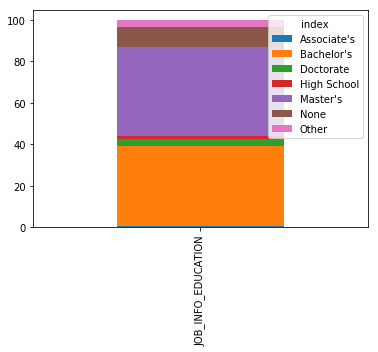

In [422]:
%matplotlib inline
import matplotlib.pyplot as plt
#ind_code_det = ind_code_det.set_index('Name')
tmp_pivot.plot.bar(stacked=True)
#plt.savefig('Industries.png')

In [403]:
(data['FOREIGN_WORKER_INFO_EDUCATION'].value_counts(dropna=False) / data['FOREIGN_WORKER_INFO_EDUCATION'].value_counts(dropna=False).sum()) * 100

Master's       43.118697
Bachelor's     36.756005
None            7.813868
Doctorate       5.100048
Other           4.283268
High School     1.857517
Associate's     0.965206
NaN             0.105391
Name: FOREIGN_WORKER_INFO_EDUCATION, dtype: float64

In [423]:
tmp_wage = (data['PW_LEVEL_9089'].value_counts(dropna=False) / data['PW_LEVEL_9089'].value_counts(dropna=False).sum()) * 100
#Level I entry
#LEvel II qualified
#Level III experienced
#LEvel IV fully qualified

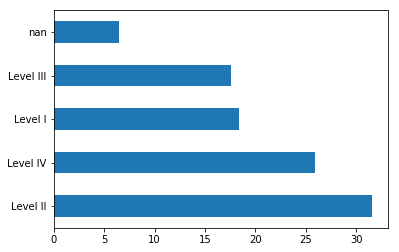

In [424]:
%matplotlib inline
import matplotlib.pyplot as plt
#ind_code_det = ind_code_det.set_index('Name')
tmp_wage.plot.barh()
#plt.savefig('Industries.png')

In [425]:
tmp_ctry = (data['COUNTRY_OF_CITIZENSHIP'].value_counts(dropna=False) / data['COUNTRY_OF_CITIZENSHIP'].value_counts(dropna=False).sum()) * 100

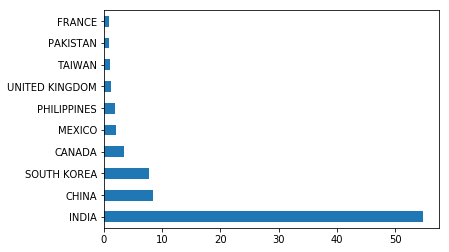

In [429]:
%matplotlib inline
import matplotlib.pyplot as plt
#ind_code_det = ind_code_det.set_index('Name')
tmp_ctry.head(n=10).plot.barh()

In [164]:
(data['JOB_INFO_EDUCATION_OTHER'].value_counts(dropna=False) / data['JOB_INFO_EDUCATION_OTHER'].value_counts(dropna=False).sum()) * 100

NaN                                                                                                     96.784988
MD                                                                                                       0.318515
Medical Degree                                                                                           0.316759
M.D.                                                                                                     0.241521
Medical Degree or foreign equivalent                                                                     0.091924
Medical degree                                                                                           0.091632
Doctor of Medicine                                                                                       0.055330
Juris Doctor                                                                                             0.052403
Medical Degree (MD)                                                                     

In [165]:
(data['JOB_INFO_EXPERIENCE'].value_counts(dropna=False) / data['JOB_INFO_EXPERIENCE'].value_counts(dropna=False).sum()) * 100

Y      56.107265
N      43.886880
NaN     0.005855
Name: JOB_INFO_EXPERIENCE, dtype: float64

In [166]:
(data['JOB_INFO_EXPERIENCE_NUM_MONTHS'].value_counts(dropna=False) / data['JOB_INFO_EXPERIENCE_NUM_MONTHS'].value_counts(dropna=False).sum()) * 100

NaN       43.848822
 24.0     15.287557
 60.0     13.563827
 12.0     13.420671
 36.0      6.195530
 6.0       3.176662
 48.0      1.166620
 72.0      0.807705
 84.0      0.569404
 96.0      0.522271
 3.0       0.388190
 120.0     0.328762
 18.0      0.138179
 2.0       0.089290
 0.0       0.086948
 1.0       0.079629
 9.0       0.055916
 108.0     0.049182
 4.0       0.045084
 144.0     0.034545
 5.0       0.030739
 10.0      0.022835
 30.0      0.019614
 180.0     0.015809
 8.0       0.007319
 156.0     0.005855
 20.0      0.004977
 23.0      0.004099
 27.0      0.004099
 42.0      0.004099
 132.0     0.003806
 240.0     0.003220
 168.0     0.003220
 15.0      0.002928
 25.0      0.001757
 16.0      0.001464
 22.0      0.001464
 13.0      0.001171
 33.0      0.001171
 11.0      0.000586
 21.0      0.000586
 192.0     0.000586
 26.0      0.000586
 244.0     0.000586
 80.0      0.000586
 66.0      0.000586
 45.0      0.000293
 7.0       0.000293
 40.0      0.000293
 14.0      0.000293


In [252]:
(data['NAICS_US_TITLE'].value_counts(dropna=False) / data['NAICS_US_TITLE'].value_counts(dropna=False).sum()) * 100

Custom Computer Programming Services                                                     20.334324
Computer Systems Design Services                                                          9.592342
Software Publishers                                                                       4.203639
Colleges, Universities, and Professional Schools                                          3.133042
Poultry Processing                                                                        2.806915
Other Computer Related Services                                                           2.614283
Semiconductor and Other Electronic Component Manufacturing                                2.532313
Computer Systems Design and Related Services                                              2.500695
Engineering Services                                                                      2.097575
Electronic Computer Manufacturing                                                         2.029363
Electronic

In [207]:
(data['NAICS_US_CODE'].value_counts(dropna=False) / data['NAICS_US_CODE'].value_counts(dropna=False).sum()) * 100

#the first 2 numbers are the industry (there are 92), so gonna truncate it
ind_code = data['NAICS_US_CODE'].apply(lambda word: str(word).replace("-", ""))
    

ind_code = ind_code.apply(lambda num: num[:2])
ind_code.value_counts()
#counts for each industry
ind_code = pd.DataFrame(ind_code.value_counts())
ind_code = ind_code.reset_index()
ind_code.columns = ['sector code','count']

In [212]:
ind_code.at[22,'sector code'] = -99
#df.at['C', 'x'] = 10

In [196]:
naics_codes = pd.read_excel("NAICS sector codes.xlsx")

pandas.core.frame.DataFrame

In [217]:
ind_code['sector code'] = pandas.to_numeric(ind_code['sector code'])
naics_codes['Sector'] = pandas.to_numeric(naics_codes['Sector'])

In [226]:
ind_code_det = ind_code.merge(naics_codes, how ="left", left_on = "sector code", right_on = "Sector")
ind_code_det = ind_code_det[['Name','count']]

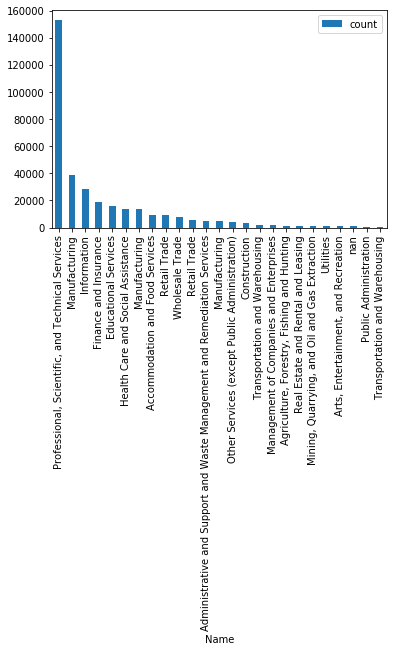

In [410]:
%matplotlib inline
import matplotlib.pyplot as plt
#ind_code_det = ind_code_det.set_index('Name')
ind_code_det.plot.bar()
plt.savefig('Industries.png')

In [254]:
#Is this for profession, not college / uni professor
(data['RECR_INFO_PROFESSIONAL_OCC'].value_counts(dropna=False) / data['RECR_INFO_PROFESSIONAL_OCC'].value_counts(dropna=False).sum()) * 100

Y      86.794795
N      13.197008
NaN     0.008197
Name: RECR_INFO_PROFESSIONAL_OCC, dtype: float64

In [255]:
#Is this for college / uni professor
(data['RECR_INFO_COLL_UNIV_TEACHER'].value_counts(dropna=False) / data['RECR_INFO_COLL_UNIV_TEACHER'].value_counts(dropna=False).sum()) * 100

N      97.366395
Y       2.618967
NaN     0.014638
Name: RECR_INFO_COLL_UNIV_TEACHER, dtype: float64

In [160]:
(data['RECR_INFO_COLL_TEACH_COMP_PROC'].value_counts(dropna=False) / data['RECR_INFO_COLL_TEACH_COMP_PROC'].value_counts(dropna=False).sum()) * 100

NaN    96.967958
Y       2.464101
N       0.567941
Name: RECR_INFO_COLL_TEACH_COMP_PROC, dtype: float64

In [238]:
(data['JOB_INFO_FOREIGN_ED'].value_counts(dropna=False) / data['JOB_INFO_FOREIGN_ED'].value_counts(dropna=False).sum()) * 100
#since there are 10% no, would be interesting to see if the nos experiences for the other people would still be accepted

Y      89.549600
N      10.353499
NaN     0.096901
Name: JOB_INFO_FOREIGN_ED, dtype: float64

In [240]:
#what was their previous class of admission
(data['CLASS_OF_ADMISSION'].value_counts(dropna=False) / data['CLASS_OF_ADMISSION'].value_counts(dropna=False).sum()) * 100

H-1B          72.545047
NaN            6.816166
L-1            6.169475
F-1            4.784461
Not in USA     3.243995
TN             1.230440
E-2            1.215510
B-2            0.865085
EWI            0.398437
Parolee        0.355402
F-2            0.294802
J-1            0.282799
E-3            0.266405
O-1            0.230689
H-4            0.176237
B-1            0.159258
L-2            0.158379
E-1            0.141400
H-1B1          0.121200
H-2B           0.108611
P-1            0.057087
TPS            0.055916
A1/A2          0.045962
H-2A           0.043035
R-1            0.033081
J-2            0.032788
G-4            0.027812
I              0.025470
G-5            0.015223
VWT            0.014052
P-3            0.010539
H-3            0.010246
H-1A           0.009368
A-3            0.008197
C-1            0.006441
M-1            0.006148
O-2            0.005855
TD             0.004391
O-3            0.004391
C-3            0.003220
G-1            0.003220
VWB            0

In [401]:
#making the VISA column into booleans, if have H1B, if have other, if have none
visa_info = pd.DataFrame(data[['CASE_NUMBER','CLASS_OF_ADMISSION']])
visa_info['CLASS_OF_ADMISSION'] = np.where(visa_info['CLASS_OF_ADMISSION'].isnull(), "None", visa_info['CLASS_OF_ADMISSION'])
visa_info['H1B_VISA'] = np.where(visa_info['CLASS_OF_ADMISSION'] == "H-1B", 1, 0)
tmp = np.isin(visa_info['CLASS_OF_ADMISSION'], ['H-1B','None','Not in USA','Parolee'])
visa_info['Other_Visa'] = np.where(tmp , 0, 1)
tmp = np.isin(visa_info['CLASS_OF_ADMISSION'], ['None','Not in USA','Parolee'])
visa_info['No_US_Visa'] = np.where(tmp , 1, 0)
#visa_info['No_US_Visa'] = np.where(visa_info['CLASS_OF_ADMISSION']  in ['H-1B','NaN','Not in USA','Parolee'] , 1, 0)
visa_info

,CASE_NUMBER,CLASS_OF_ADMISSION,H1B_VISA,Other_Visa,No_US_Visa
0,A-14220-96665,H-1B,1,0,0
1,A-14220-96720,H-1B,1,0,0
2,A-14203-91167,L-1,0,1,0
3,A-14206-92509,H-1B,1,0,0
4,A-14202-90786,H-1B,1,0,0
5,A-14202-90819,H-1B,1,0,0
6,A-14202-90920,H-1B,1,0,0
7,A-14220-96712,H-1B,1,0,0
8,A-14226-98150,H-1B,1,0,0
9,A-14226-98245,None,0,0,1


In [253]:
#this is a requirement now I believe
(data['RI_POSTED_NOTICE_AT_WORKSITE'].value_counts(dropna=False) / data['RI_POSTED_NOTICE_AT_WORKSITE'].value_counts(dropna=False).sum()) * 100

Y      98.397471
A       1.517631
N       0.049475
NaN     0.035423
Name: RI_POSTED_NOTICE_AT_WORKSITE, dtype: float64

In [241]:
(data['FOREIGN_WORKER_INFO_EDUCATION'].value_counts(dropna=False) / data['FOREIGN_WORKER_INFO_EDUCATION'].value_counts(dropna=False).sum()) * 100
#standardized, just like JOB_INFO_EDUCATION, going to combine the two columns to check if they have same or above degrees 

Master's       43.118697
Bachelor's     36.756005
None            7.813868
Doctorate       5.100048
Other           4.283268
High School     1.857517
Associate's     0.965206
NaN             0.105391
Name: FOREIGN_WORKER_INFO_EDUCATION, dtype: float64

## Education comparison

In [242]:
same_edu = np.where(data['JOB_INFO_EDUCATION'] == data ['FOREIGN_WORKER_INFO_EDUCATION'], 1 , 0 )

In [396]:
mapping = {"Master's" : 4, "Bachelor's": 3, "None":0, "Doctorate":5 , "Other": - 1, "High School":1, "Associate's":2, "NaN":-1}

edu = data[['CASE_NUMBER','JOB_INFO_EDUCATION','FOREIGN_WORKER_INFO_EDUCATION']]
edu = edu.replace({'FOREIGN_WORKER_INFO_EDUCATION': mapping, 'JOB_INFO_EDUCATION': mapping})

In [397]:
edu['Higher education'] = np.where(edu['FOREIGN_WORKER_INFO_EDUCATION'] > edu['JOB_INFO_EDUCATION'], 1,0)

In [251]:
edu['Higher education'].sum()

44914

In [361]:
#Getting decision date year
pd.DatetimeIndex(data['DECISION_DATE']).year

Int64Index([2015, 2015, 2014, 2015, 2015, 2014, 2015, 2015, 2015, 2015,
            ...
            2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016],
           dtype='int64', name='DECISION_DATE', length=341585)

In [363]:
#Getting agent firm boolean
np.where(pd.isnull(data['AGENT_FIRM_NAME']), 0, 1)

array([1, 1, 1, ..., 1, 1, 0])

## Dealing with the recruitment date fields

In [105]:
recr_dates = data[["RECR_INFO_SWA_JOB_ORDER_START","RECR_INFO_SWA_JOB_ORDER_END","RECR_INFO_FIRST_AD_START","RECR_INFO_SECOND_AD_START","RECR_INFO_JOB_FAIR_FROM","RECR_INFO_JOB_FAIR_TO","RECR_INFO_ON_CAMPUS_RECR_FROM","RECR_INFO_ON_CAMPUS_RECR_TO","RI_EMPLOYER_WEB_POST_FROM","RI_EMPLOYER_WEB_POST_TO","RECR_INFO_PRO_ORG_ADVERT_FROM","RECR_INFO_PRO_ORG_ADVERT_TO","RI_JOB_SEARCH_WEBSITE_FROM","RI_JOB_SEARCH_WEBSITE_TO","RI_PVT_EMPLOYMENT_FIRM_FROM","RI_PVT_EMPLOYMENT_FIRM_TO","RI_EMPLOYEE_REFERRAL_PROG_FROM","RI_EMPLOYEE_REFERRAL_PROG_TO","RI_CAMPUS_PLACEMENT_FROM","RI_CAMPUS_PLACEMENT_TO","RI_LOCAL_ETHNIC_PAPER_FROM","RI_LOCAL_ETHNIC_PAPER_TO","RECR_INFO_RADIO_TV_AD_FROM","RECR_INFO_RADIO_TV_AD_TO"]]

In [108]:
recr_dates.head(n=10)

,RECR_INFO_SWA_JOB_ORDER_START,RECR_INFO_SWA_JOB_ORDER_END,RECR_INFO_FIRST_AD_START,RECR_INFO_SECOND_AD_START,RECR_INFO_JOB_FAIR_FROM,RECR_INFO_JOB_FAIR_TO,RECR_INFO_ON_CAMPUS_RECR_FROM,RECR_INFO_ON_CAMPUS_RECR_TO,RI_EMPLOYER_WEB_POST_FROM,RI_EMPLOYER_WEB_POST_TO,...,RI_PVT_EMPLOYMENT_FIRM_FROM,RI_PVT_EMPLOYMENT_FIRM_TO,RI_EMPLOYEE_REFERRAL_PROG_FROM,RI_EMPLOYEE_REFERRAL_PROG_TO,RI_CAMPUS_PLACEMENT_FROM,RI_CAMPUS_PLACEMENT_TO,RI_LOCAL_ETHNIC_PAPER_FROM,RI_LOCAL_ETHNIC_PAPER_TO,RECR_INFO_RADIO_TV_AD_FROM,RECR_INFO_RADIO_TV_AD_TO
0,2014-05-15 00:00:00,2014-06-27 00:00:00,2014-05-25,2014-06-01,NaT,NaT,NaT,NaT,2014-05-15 00:00:00,2014-06-27,...,NaT,NaT,NaN,NaT,2014-05-23 00:00:00,2014-06-27,NaN,NaT,NaT,NaT
1,2014-05-29 00:00:00,2014-07-03 00:00:00,2014-06-01,2014-06-08,NaT,NaT,NaT,NaT,2014-05-30 00:00:00,2014-06-27,...,NaT,NaT,NaN,NaT,NaN,NaT,2014-06-04 00:00:00,2014-06-04,NaT,NaT
2,2014-03-10 00:00:00,2014-04-11 00:00:00,2014-03-23,2014-03-30,NaT,NaT,NaT,NaT,NaN,NaT,...,NaT,NaT,NaN,NaT,NaN,NaT,2014-03-26 00:00:00,2014-03-26,NaT,NaT
3,2014-06-05 00:00:00,2014-07-07 00:00:00,2014-06-08,2014-06-15,NaT,NaT,NaT,NaT,NaN,NaT,...,NaT,NaT,NaN,NaT,NaN,NaT,2014-06-13 00:00:00,2014-06-13,NaT,NaT
4,2014-04-01 00:00:00,2014-05-06 00:00:00,2014-04-27,2014-05-04,NaT,NaT,NaT,NaT,2014-04-22 00:00:00,2014-06-26,...,NaT,NaT,2014-06-16 00:00:00,2014-07-03,NaN,NaT,NaN,NaT,NaT,NaT
5,2014-05-22 00:00:00,2014-06-24 00:00:00,2014-02-02,2014-02-09,NaT,NaT,NaT,NaT,NaN,NaT,...,NaT,NaT,NaN,NaT,NaN,NaT,2014-02-03 00:00:00,2014-02-03,NaT,NaT
6,2014-05-17 00:00:00,2014-06-21 00:00:00,2014-06-01,2014-06-08,NaT,NaT,NaT,NaT,2014-05-14 00:00:00,2014-06-17,...,NaT,NaT,2014-05-12 00:00:00,2014-06-16,NaN,NaT,NaN,NaT,NaT,NaT
7,2014-02-20 00:00:00,2014-03-22 00:00:00,2014-06-08,2014-06-15,NaT,NaT,NaT,NaT,2014-06-05 00:00:00,2014-07-09,...,NaT,NaT,NaN,NaT,NaN,NaT,2014-06-08 00:00:00,2014-06-08,NaT,NaT
8,2014-06-13 00:00:00,2014-07-15 00:00:00,2014-06-15,2014-06-22,NaT,NaT,NaT,NaT,2014-06-16 00:00:00,2014-07-16,...,NaT,NaT,NaN,NaT,NaN,NaT,2014-08-21 00:00:00,2014-08-21,NaT,NaT
9,2014-05-15 00:00:00,2014-06-16 00:00:00,2014-06-15,2014-06-22,NaT,NaT,NaT,NaT,NaN,NaT,...,NaT,NaT,NaN,NaT,NaN,NaT,2014-06-19 00:00:00,2014-06-19,NaT,NaT


In [313]:
import datetime as dt

In [288]:
#recr_dates['RECR_INFO_SWA_JOB_ORDER_START'] = pd.to_datetime(recr_dates['RECR_INFO_SWA_JOB_ORDER_START'])
#recr_dates['RECR_INFO_SWA_JOB_ORDER_START'] = pd.to_datetime(recr_dates['RECR_INFO_SWA_JOB_ORDER_START'], errors='ignore')#
#recr_dates['RI_EMPLOYEE_REFERRAL_PROG_TO']
tmp = recr_dates['RI_EMPLOYEE_REFERRAL_PROG_TO'][4]
tmp.iloc[0]
#datetime.strptime(tmp.iloc[0], "%Y-%m-%d")

Timestamp('2014-07-03 00:00:00')

In [304]:
tmp = pd.DataFrame(recr_dates['RI_EMPLOYEE_REFERRAL_PROG_TO'])
tmp.dtypes.value_counts()

datetime64[ns]    1
dtype: int64

In [305]:
recr_dates['RECR_INFO_SWA_JOB_ORDER_START'] = np.where(recr_dates['RECR_INFO_SWA_JOB_ORDER_START'].isnull(), pd.NaT, recr_dates['RECR_INFO_SWA_JOB_ORDER_START'])

/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [307]:
recr_dates['RECR_INFO_SWA_JOB_ORDER_END'] = np.where(recr_dates['RECR_INFO_SWA_JOB_ORDER_END'].isnull(), pd.NaT, recr_dates['RECR_INFO_SWA_JOB_ORDER_END'])

/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [325]:
if isinstance(type(recr_dates['RECR_INFO_SWA_JOB_ORDER_START'].iloc[1]), pd.Timestamp):
    #isinstance(now, datetime.datetime)
    print("Yes")
else:
    print("No")

No


In [143]:
(recr_dates["RECR_INFO_JOB_FAIR_TO"] - recr_dates["RECR_INFO_JOB_FAIR_FROM"]).value_counts()

0 days      2049
1 days       123
2 days        53
30 days       19
4 days        15
3 days        14
5 days        11
21 days       10
29 days        7
31 days        6
14 days        6
47 days        5
35 days        5
25 days        5
42 days        5
60 days        4
41 days        4
15 days        3
27 days        3
7 days         3
33 days        2
160 days       2
8 days         2
44 days        2
54 days        2
19 days        2
6 days         2
13 days        2
32 days        2
197 days       2
151 days       2
519 days       2
20 days        2
73 days        2
16 days        1
52 days        1
11 days        1
70 days        1
17 days        1
68 days        1
86 days        1
dtype: int64

In [308]:
recr_dates.dtypes

RECR_INFO_SWA_JOB_ORDER_START             object
RECR_INFO_SWA_JOB_ORDER_END               object
RECR_INFO_FIRST_AD_START          datetime64[ns]
RECR_INFO_SECOND_AD_START         datetime64[ns]
RECR_INFO_JOB_FAIR_FROM           datetime64[ns]
RECR_INFO_JOB_FAIR_TO             datetime64[ns]
RECR_INFO_ON_CAMPUS_RECR_FROM     datetime64[ns]
RECR_INFO_ON_CAMPUS_RECR_TO       datetime64[ns]
RI_EMPLOYER_WEB_POST_FROM                 object
RI_EMPLOYER_WEB_POST_TO           datetime64[ns]
RECR_INFO_PRO_ORG_ADVERT_FROM             object
RECR_INFO_PRO_ORG_ADVERT_TO       datetime64[ns]
RI_JOB_SEARCH_WEBSITE_FROM                object
RI_JOB_SEARCH_WEBSITE_TO          datetime64[ns]
RI_PVT_EMPLOYMENT_FIRM_FROM       datetime64[ns]
RI_PVT_EMPLOYMENT_FIRM_TO         datetime64[ns]
RI_EMPLOYEE_REFERRAL_PROG_FROM            object
RI_EMPLOYEE_REFERRAL_PROG_TO      datetime64[ns]
RI_CAMPUS_PLACEMENT_FROM                  object
RI_CAMPUS_PLACEMENT_TO            datetime64[ns]
RI_LOCAL_ETHNIC_PAPE

In [352]:
#GOing to try and just do a full count of how many recruitments options they tried
recr_count = recr_dates[["RECR_INFO_SWA_JOB_ORDER_START","RECR_INFO_FIRST_AD_START","RECR_INFO_SECOND_AD_START","RECR_INFO_JOB_FAIR_FROM", "RECR_INFO_ON_CAMPUS_RECR_FROM","RI_EMPLOYER_WEB_POST_FROM","RECR_INFO_PRO_ORG_ADVERT_FROM","RI_JOB_SEARCH_WEBSITE_FROM","RI_PVT_EMPLOYMENT_FIRM_FROM","RI_EMPLOYEE_REFERRAL_PROG_FROM","RI_CAMPUS_PLACEMENT_FROM","RI_LOCAL_ETHNIC_PAPER_FROM","RECR_INFO_RADIO_TV_AD_FROM"]]

In [353]:
recr_count.head(n=10)

,RECR_INFO_SWA_JOB_ORDER_START,RECR_INFO_FIRST_AD_START,RECR_INFO_SECOND_AD_START,RECR_INFO_JOB_FAIR_FROM,RECR_INFO_ON_CAMPUS_RECR_FROM,RI_EMPLOYER_WEB_POST_FROM,RECR_INFO_PRO_ORG_ADVERT_FROM,RI_JOB_SEARCH_WEBSITE_FROM,RI_PVT_EMPLOYMENT_FIRM_FROM,RI_EMPLOYEE_REFERRAL_PROG_FROM,RI_CAMPUS_PLACEMENT_FROM,RI_LOCAL_ETHNIC_PAPER_FROM,RECR_INFO_RADIO_TV_AD_FROM
0,2014-05-15 00:00:00,2014-05-25,2014-06-01,NaT,NaT,2014-05-15 00:00:00,NaN,2014-05-16 00:00:00,NaT,NaN,2014-05-23 00:00:00,NaN,NaT
1,2014-05-29 00:00:00,2014-06-01,2014-06-08,NaT,NaT,2014-05-30 00:00:00,NaN,2014-05-29 00:00:00,NaT,NaN,NaN,2014-06-04 00:00:00,NaT
2,2014-03-10 00:00:00,2014-03-23,2014-03-30,NaT,NaT,NaN,2014-03-21 00:00:00,2014-03-21 00:00:00,NaT,NaN,NaN,2014-03-26 00:00:00,NaT
3,2014-06-05 00:00:00,2014-06-08,2014-06-15,NaT,NaT,NaN,2014-07-01 00:00:00,2014-06-11 00:00:00,NaT,NaN,NaN,2014-06-13 00:00:00,NaT
4,2014-04-01 00:00:00,2014-04-27,2014-05-04,NaT,NaT,2014-04-22 00:00:00,NaN,2014-04-27 00:00:00,NaT,2014-06-16 00:00:00,NaN,NaN,NaT
5,2014-05-22 00:00:00,2014-02-02,2014-02-09,NaT,NaT,NaN,2014-03-01 00:00:00,2014-05-22 00:00:00,NaT,NaN,NaN,2014-02-03 00:00:00,NaT
6,2014-05-17 00:00:00,2014-06-01,2014-06-08,NaT,NaT,2014-05-14 00:00:00,NaN,2014-05-13 00:00:00,NaT,2014-05-12 00:00:00,NaN,NaN,NaT
7,2014-02-20 00:00:00,2014-06-08,2014-06-15,NaT,NaT,2014-06-05 00:00:00,NaN,2014-06-08 00:00:00,NaT,NaN,NaN,2014-06-08 00:00:00,NaT
8,2014-06-13 00:00:00,2014-06-15,2014-06-22,NaT,NaT,2014-06-16 00:00:00,NaN,2014-06-16 00:00:00,NaT,NaN,NaN,2014-08-21 00:00:00,NaT
9,2014-05-15 00:00:00,2014-06-15,2014-06-22,NaT,NaT,NaN,2014-06-16 00:00:00,2014-06-16 00:00:00,NaT,NaN,NaN,2014-06-19 00:00:00,NaT


In [356]:
recr_count['Recr_Trials'] = recr_count.count(axis = 1)

/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Final data

In [390]:
data_fin = data[['CASE_NUMBER','CASE_STATUS']]

In [391]:
data_fin['CASE_STATUS'] = pd.DataFrame(np.where(data['CASE_STATUS'] == 'Certified-Expired' , 'Certified', data['CASE_STATUS']))

/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [392]:
data_fin['DEC_YEAR'] = pd.DatetimeIndex(data['DECISION_DATE']).year

/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [393]:
data_fin['LAWYER'] = np.where(pd.isnull(data['AGENT_FIRM_NAME']), 0, 1)

/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [382]:
#data_fin['RECR_TRIALS'] = recr_count.count(axis = 1)

In [394]:
data_fin['HIGHER_EDU'] =  np.where(edu['FOREIGN_WORKER_INFO_EDUCATION'] > edu['JOB_INFO_EDUCATION'], 1,0)

/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [395]:
data_fin['SAME_EDU'] = np.where(data['JOB_INFO_EDUCATION'] == data ['FOREIGN_WORKER_INFO_EDUCATION'], 1 , 0 )

/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [402]:
data_fin.merge(visa_info, left_on = "CASE_NUMBER", right_on = "CASE_NUMBER")

,CASE_NUMBER,CASE_STATUS,DEC_YEAR,LAWYER,HIGHER_EDU,SAME_EDU,CLASS_OF_ADMISSION,H1B_VISA,Other_Visa,No_US_Visa
0,A-14220-96665,Certified,2015,1,0,0,H-1B,1,0,0
1,A-14220-96720,Certified,2015,1,0,1,H-1B,1,0,0
2,A-14203-91167,Certified,2014,1,0,1,L-1,0,1,0
3,A-14206-92509,Certified,2015,1,0,1,H-1B,1,0,0
4,A-14202-90786,Certified,2015,1,1,0,H-1B,1,0,0
5,A-14202-90819,Certified,2014,1,0,1,H-1B,1,0,0
6,A-14202-90920,Certified,2015,1,0,1,H-1B,1,0,0
7,A-14220-96712,Certified,2015,1,0,1,H-1B,1,0,0
8,A-14226-98150,Certified,2015,1,0,1,H-1B,1,0,0
9,A-14226-98245,Certified,2015,1,0,1,None,0,0,1
